# Cybersecurity Threat Analysis


### vendor_project: The name of the vendor project associated with the vulnerability. (String)
### product: The name of the product associated with the vulnerability. (String)
### vulnerability_name: The name of the vulnerability. (String)
### date_added: The date the vulnerability was added to the CISA Known Exploited Vulnerabilities catalog. (Date)
### short_description: A brief description of the vulnerability. (String)
### required_action: The action required to remediate the vulnerability. (String)
### due_date: The date by which the required action must be completed. (Date)
### notes: Additional notes about the vulnerability. (String)
### grp: The group associated with the vulnerability. (String)
### pub_date: The date the vulnerability was published. (Date)
### cvss: The Common Vulnerability Scoring System score associated with the vulnerability. (Float)
### cwe: The Common Weakness Enumeration associated with the vulnerability. (String)
### vector: The vector associated with the vulnerability. (String)
### complexity: The complexity associated with the vulnerability. (String)
### severity: The severity level associated with the vulnerability. (String)

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [292]:
df=pd.read_csv('cybersecurity.csv')

# Data Exploration

In [293]:
df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


In [294]:
df.tail()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
769,CVE-2009-0563,microsoft,Office,Microsoft Office Buffer Overflow Vulnerability,2022-06-08,Microsoft Office contains a buffer overflow vu...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2009-06-10,NaN,CWE-119,NaN,NaN,NaN
770,CVE-2009-0557,microsoft,Office,Microsoft Office Object Record Corruption Vuln...,2022-06-08,Microsoft Office contains an object record cor...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2009-06-10,NaN,CWE-94,NaN,NaN,NaN
771,CVE-2008-0655,adobe,Acrobat and Reader,Adobe Acrobat and Reader Unspecified Vulnerabi...,2022-06-08,Adobe Acrobat and Reader contains an unespecif...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2008-02-07,NaN,NVD-CWE-noinfo,NaN,NaN,NaN
772,CVE-2007-5659,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2008-02-12,NaN,CWE-119,NaN,NaN,NaN
773,CVE-2006-2492,microsoft,Word,Microsoft Word Malformed Object Pointer Vulner...,2022-06-08,Microsoft Word and Microsoft Works Suites cont...,Apply updates per vendor instructions.,2022-06-22,NaN,37,2006-05-20,NaN,NVD-CWE-Other,NaN,NaN,NaN


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cve_id              774 non-null    object 
 1   vendor_project      774 non-null    object 
 2   product             773 non-null    object 
 3   vulnerability_name  774 non-null    object 
 4   date_added          774 non-null    object 
 5   short_description   768 non-null    object 
 6   required_action     774 non-null    object 
 7   due_date            774 non-null    object 
 8   notes               0 non-null      float64
 9   grp                 774 non-null    int64  
 10  pub_date            765 non-null    object 
 11  cvss                609 non-null    float64
 12  cwe                 760 non-null    object 
 13  vector              609 non-null    object 
 14  complexity          609 non-null    object 
 15  severity            609 non-null    object 
dtypes: float

In [296]:
df.isna().sum()

cve_id                  0
vendor_project          0
product                 1
vulnerability_name      0
date_added              0
short_description       6
required_action         0
due_date                0
notes                 774
grp                     0
pub_date                9
cvss                  165
cwe                    14
vector                165
complexity            165
severity              165
dtype: int64

In [297]:
print('shape of the data- ', df.shape)
print('size of the data- ', df.size)

shape of the data-  (774, 16)
size of the data-  12384


In [298]:
# Descriptive Statistics comparision
describe=df.describe()
describe

,notes,grp,cvss
count,0.0,774.000000,609.000000
mean,NaN,13.434109,8.422496
std,NaN,12.225148,1.301657
min,NaN,1.000000,3.100000
25%,NaN,1.000000,7.800000
50%,NaN,16.000000,8.800000
75%,NaN,20.000000,9.800000
max,NaN,37.000000,10.000000


In [299]:
describe.drop(columns='notes',axis=1, inplace=True)
describe.drop('count',axis=0,inplace=True)
describe

,grp,cvss
mean,13.434109,8.422496
std,12.225148,1.301657
min,1.000000,3.100000
25%,1.000000,7.800000
50%,16.000000,8.800000
75%,20.000000,9.800000
max,37.000000,10.000000


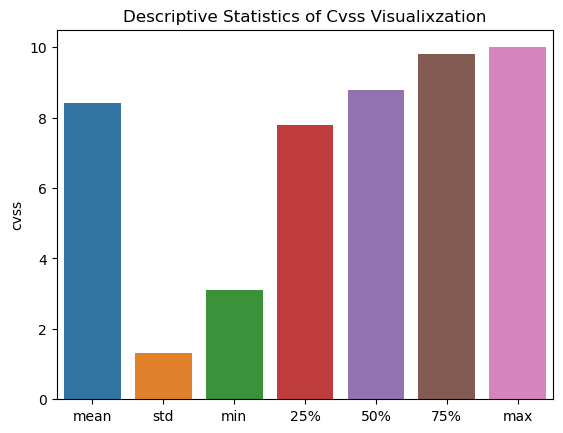

In [300]:
sns.barplot(x=describe.index, y=describe['cvss'])
plt.title('Descriptive Statistics of Cvss Visualixzation')
plt.show()

In [301]:
df.corr()

,notes,grp,cvss
notes,NaN,NaN,NaN
grp,NaN,1.000000,-0.062406
cvss,NaN,-0.062406,1.000000


In [302]:
df.skew()

notes         NaN
grp      0.515606
cvss    -0.819088
dtype: float64

        values
grp   0.515606
cvss -0.819088


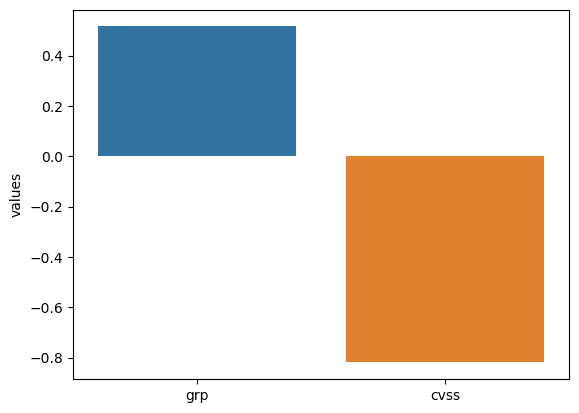

In [303]:
skew=pd.DataFrame(df.skew())
skew.rename(columns={0:'values'},inplace=True)
skew.drop('notes',axis=0,inplace=True)
print(skew)

sns.barplot(x=skew.index, y=skew['values'])
plt.show()

# Pre-processing
### Correcting the missing values and deleting unnecessary columns

In [304]:
df.isna().sum()

cve_id                  0
vendor_project          0
product                 1
vulnerability_name      0
date_added              0
short_description       6
required_action         0
due_date                0
notes                 774
grp                     0
pub_date                9
cvss                  165
cwe                    14
vector                165
complexity            165
severity              165
dtype: int64

In [305]:
# cve_id column
df['cve_id'].value_counts()

CVE-2021-27104    1
CVE-2016-6277     1
CVE-2020-9054     1
CVE-2020-7247     1
CVE-2020-5410     1
                 ..
CVE-2020-8467     1
CVE-2020-8468     1
CVE-2020-24557    1
CVE-2020-8599     1
CVE-2006-2492     1
Name: cve_id, Length: 774, dtype: int64

In [306]:
# better to drop cve_id column
df.drop(columns='cve_id',axis=1,inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [307]:
# product column
df['product'].value_counts()

Windows                                   78
Flash Player                              29
Internet Explorer                         24
Win32k                                    20
Chromium V8 Engine                        20
                                          ..
Microsoft Desktop Window Manager (DWM)     1
vRealize Operations Manager API            1
System Information Library for Node.JS     1
BIG-IP Traffic Management Microkernel      1
Acrobat and Reader, Flash Player           1
Name: product, Length: 346, dtype: int64

In [308]:
df[df['product'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
305,fuel cms,NaN,Fuel CMS SQL Injection Vulnerability,2021-12-10,FUEL CMS 1.4.7 allows SQL Injection via the co...,Apply updates per vendor instructions.,2022-06-10,NaN,4,2020-08-13,9.8,CWE-89,NETWORK,LOW,CRITICAL


In [309]:
# filling the null value with heighest occured value that is Windows
df['product'].fillna('Windows',inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [310]:
# short_description column
df['short_description'].value_counts()

A vulnerability in Cisco Small Business RV160, RV260, RV340, and RV345 Series Routers could allow an attacker to do any of the following: Execute arbitrary code elevate privileges, execute arbitrary commands, bypass authentication and authorization protections, fetch and run unsigned software, or cause a denial of service (DoS).                                         5
The Simple Network Management Protocol (SNMP) subsystem of Cisco IOS and IOS XE contains a vulnerability that could allow an authenticated, remote attacker to remotely execute code.                                                                                                                                                                                              4
Microsoft Win32k contains an unspecified vulnerability that allows for privilege escalation.                                                                                                                                                                  

In [311]:
df[df['short_description'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
10,android,Android OS,"Android ""AbstractEmu"" Root Access Vulnerabilities",2021-11-03,NaN,Apply updates per vendor instructions.,2022-05-03,NaN,1,2019-10-11,7.8,CWE-416,LOCAL,LOW,HIGH
11,android,Android OS,"Android ""AbstractEmu"" Root Access Vulnerabilities",2021-11-03,NaN,Apply updates per vendor instructions.,2022-05-03,NaN,1,2020-03-10,7.8,CWE-787,LOCAL,LOW,HIGH
12,android,Android OS,"Android ""AbstractEmu"" Root Access Vulnerabilities",2021-11-03,NaN,Apply updates per vendor instructions.,2022-05-03,NaN,1,2020-03-10,7.8,CWE-787,LOCAL,LOW,HIGH
26,apple,iOS and macOS,Apple iOS and macOS Memory Corruption Vulnerab...,2021-11-03,NaN,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-10-19,7.8,NVD-CWE-noinfo,LOCAL,LOW,HIGH
105,google,Chromium V8 Engine,Google Chromium V8 Insufficient Input Validati...,2021-11-03,NaN,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-11-23,6.1,CWE-20,NETWORK,LOW,MEDIUM
106,google,Chromium V8 Engine,Google Chromium V8 Incorrect Implementation Vu...,2021-11-03,NaN,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-11-23,8.8,CWE-787,NETWORK,LOW,HIGH


In [312]:
df['short_description'].dropna(axis=0,inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [313]:
# notes column
df['notes'].value_counts()

Series([], Name: notes, dtype: int64)

In [314]:
# since the entire column is empty it is better to drop the column
df.drop(columns='notes',axis=1,inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [315]:
# pub_date column
df['pub_date'].value_counts()

2018-03-28    15
2017-03-17    13
2021-09-08     8
2017-09-29     8
2019-04-09     7
              ..
2017-12-12     1
2022-01-04     1
2019-08-01     1
2019-03-21     1
2006-05-20     1
Name: pub_date, Length: 477, dtype: int64

In [316]:
df[df['pub_date'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
478,mozilla,Firefox,Mozilla Firefox Use-After-Free Vulnerability,2022-03-07,Mozilla Firefox contains a use-after-free vuln...,Apply updates per vendor instructions.,2022-03-21,17,NaN,NaN,NaN,NaN,NaN,NaN
479,mozilla,Firefox,Mozilla Firefox Use-After-Free Vulnerability,2022-03-07,Mozilla Firefox contains a use-after-free vuln...,Apply updates per vendor instructions.,2022-03-21,17,NaN,NaN,NaN,NaN,NaN,NaN
570,google,Chromium V8,Google Chromium V8 Type Confusion Vulnerability,2022-03-28,The vulnerability exists due to a type confusi...,Apply updates per vendor instructions.,2022-04-18,20,NaN,NaN,NaN,NaN,NaN,NaN
610,apple,macOS,Apple macOS Out-of-Bounds Write Vulnerability,2022-04-04,macOS Monterey contains an out-of-bounds write...,Apply updates per vendor instructions.,2022-04-25,22,NaN,NaN,NaN,NaN,NaN,NaN
611,apple,macOS,Apple macOS Out-of-Bounds Read Vulnerability,2022-04-04,macOS Monterey contains an out-of-bounds read ...,Apply updates per vendor instructions.,2022-04-25,22,NaN,NaN,NaN,NaN,NaN,NaN
624,microsoft,Windows,Microsoft Windows CLFS Driver Privilege Escala...,2022-04-13,Microsoft Windows Common Log File System (CLFS...,Apply updates per vendor instructions.,2022-05-04,25,NaN,NaN,NaN,NaN,NaN,NaN
636,google,Chromium V8 Engine,Google Chromium V8 Type Confusion Vulnerability,2022-04-15,Google Chromium V8 engine contains a type conf...,Apply updates per vendor instructions.,2022-05-06,27,NaN,NaN,NaN,NaN,NaN,NaN
662,cisco,IOS XR,Cisco IOS XR Open Port Vulnerability,2022-05-23,Cisco IOS XR software health check opens TCP p...,Apply updates per vendor instructions.,2022-06-13,33,NaN,NaN,NaN,NaN,NaN,NaN
677,webkitgtk,WebKitGTK,WebKitGTK Memory Corruption Vulnerability,2022-05-23,WebKitGTK contains a memory corruption vulnera...,Apply updates per vendor instructions.,2022-06-13,33,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
# dropping the null values
df.dropna(subset=['pub_date'], inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [318]:
# cvss column
df['cvss'].value_counts()

9.8     182
7.8     131
8.8     103
7.5      56
8.1      18
10.0     17
6.5      16
7.2      13
5.5       8
5.3       8
6.1       7
4.3       7
7.0       6
8.6       5
9.1       4
5.9       4
9.6       3
9.9       3
5.4       2
9.0       2
8.4       2
6.3       2
4.9       1
6.6       1
7.1       1
6.8       1
7.4       1
8.0       1
4.7       1
6.4       1
8.2       1
3.1       1
Name: cvss, dtype: int64

In [319]:
df[df['cvss'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
123,microsoft,Windows,Microsoft Windows Group Policy Privilege Escal...,2021-11-03,Allows remote authenticated users to obtain se...,Apply updates per vendor instructions.,2022-05-03,1,2014-05-14,NaN,CWE-255,NaN,NaN,NaN
171,microsoft,MSCOMCTL.OCX,Microsoft MSCOMCTL.OCX Remote Code Execution V...,2021-11-03,Allows remote attackers to execute arbitrary c...,Apply updates per vendor instructions.,2022-05-03,1,2012-04-10,NaN,CWE-94,NaN,NaN,NaN
172,microsoft,Office,Microsoft Office Memory Corruption vulnerability,2021-11-03,Allows remote attackers to execute arbitrary c...,Apply updates per vendor instructions.,2022-05-03,1,2015-04-14,NaN,CWE-399,NaN,NaN,NaN
209,oracle,Oracle Reports Developer,Oracle Reports Developer Arbitrary File Read a...,2021-11-03,Allows remote attackers to affect confidential...,Apply updates per vendor instructions.,2022-05-03,1,2012-10-16,NaN,NVD-CWE-noinfo,NaN,NaN,NaN
211,oracle,Oracle WebLogic Server,Oracle WebLogic Server Remote Code Execution V...,2021-11-03,Allows remote attackers to execute arbitrary c...,Apply updates per vendor instructions.,2022-05-03,1,2015-11-18,NaN,CWE-77,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,microsoft,Office,Microsoft Office Buffer Overflow Vulnerability,2022-06-08,Microsoft Office contains a buffer overflow vu...,Apply updates per vendor instructions.,2022-06-22,37,2009-06-10,NaN,CWE-119,NaN,NaN,NaN
770,microsoft,Office,Microsoft Office Object Record Corruption Vuln...,2022-06-08,Microsoft Office contains an object record cor...,Apply updates per vendor instructions.,2022-06-22,37,2009-06-10,NaN,CWE-94,NaN,NaN,NaN
771,adobe,Acrobat and Reader,Adobe Acrobat and Reader Unspecified Vulnerabi...,2022-06-08,Adobe Acrobat and Reader contains an unespecif...,Apply updates per vendor instructions.,2022-06-22,37,2008-02-07,NaN,NVD-CWE-noinfo,NaN,NaN,NaN
772,adobe,Acrobat and Reader,Adobe Acrobat and Reader Buffer Overflow Vulne...,2022-06-08,Adobe Acrobat and Reader contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2008-02-12,NaN,CWE-119,NaN,NaN,NaN


In [320]:
# dropping the columns with null values
df.dropna(subset=['cvss'],inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [321]:
# cwe column
df['cwe'].value_counts()

NVD-CWE-noinfo     92
CWE-787            50
CWE-20             48
CWE-269            40
CWE-78             39
                   ..
CWE-77,CWE-787      1
CWE-22,CWE-94       1
CWE-295             1
CWE-330             1
CWE-125,CWE-787     1
Name: cwe, Length: 76, dtype: int64

In [322]:
df[df['cwe'].isna()]

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
648,microsoft,Windows,Microsoft Windows User Profile Service Privile...,2022-04-25,Microsoft Windows User Profile Service contain...,Apply updates per vendor instructions.,2022-05-16,29,2022-04-15,7.0,NaN,LOCAL,HIGH,HIGH


In [323]:
# filling the null value with the heighest occured value.
df['cwe'].fillna('NVD-CWE-noinfo',inplace=True)

# -----------------------------------------------------------------------------------------------------------

In [324]:
df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,netgear,Multiple Devices,NETGEAR Multiple Devices Buffer Overflow Vulne...,2022-06-08,Multiple NETGEAR devices contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2017-05-26,9.8,CWE-119,NETWORK,LOW,CRITICAL
750,google,Chromium V8 Engine,Google Chromium V8 Type Confusion Vulnerability,2022-06-08,Google Chromium V8 Engine contains a type conf...,Apply updates per vendor instructions.,2022-06-22,37,2017-10-27,8.8,CWE-843,NETWORK,LOW,HIGH
751,google,Chromium V8 Engine,Google Chromium V8 Memory Corruption Vulnerabi...,2022-06-08,Google Chromium V8 Engine contains a memory co...,Apply updates per vendor instructions.,2022-06-22,37,2017-04-24,8.8,CWE-125,NETWORK,LOW,HIGH
752,google,Chromium V8 Engine,Google Chromium V8 Out-of-Bounds Memory Vulner...,2022-06-08,Google Chromium V8 Engine contains an out-of-b...,Apply updates per vendor instructions.,2022-06-22,37,2017-01-19,8.8,"CWE-125,CWE-787",NETWORK,LOW,HIGH


# Encoding the catogarical columns

In [325]:
pip install category_encoders

In [326]:
# import category Encoders and use ordinal encoder
import category_encoders as ce

In [327]:
l=[]
for i in df.columns:
    l.append(i)
print(l)

['vendor_project', 'product', 'vulnerability_name', 'date_added', 'short_description', 'required_action', 'due_date', 'grp', 'pub_date', 'cvss', 'cwe', 'vector', 'complexity', 'severity']


In [328]:
encoders=ce.OrdinalEncoder(cols=['vendor_project', 'product', 'vulnerability_name', 'date_added', 'short_description', 'required_action', 'due_date', 'grp', 'pub_date', 'cwe', 'vector', 'complexity', 'severity'])
df1=encoders.fit_transform(df)

In [329]:
df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,netgear,Multiple Devices,NETGEAR Multiple Devices Buffer Overflow Vulne...,2022-06-08,Multiple NETGEAR devices contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2017-05-26,9.8,CWE-119,NETWORK,LOW,CRITICAL
750,google,Chromium V8 Engine,Google Chromium V8 Type Confusion Vulnerability,2022-06-08,Google Chromium V8 Engine contains a type conf...,Apply updates per vendor instructions.,2022-06-22,37,2017-10-27,8.8,CWE-843,NETWORK,LOW,HIGH
751,google,Chromium V8 Engine,Google Chromium V8 Memory Corruption Vulnerabi...,2022-06-08,Google Chromium V8 Engine contains a memory co...,Apply updates per vendor instructions.,2022-06-22,37,2017-04-24,8.8,CWE-125,NETWORK,LOW,HIGH
752,google,Chromium V8 Engine,Google Chromium V8 Out-of-Bounds Memory Vulner...,2022-06-08,Google Chromium V8 Engine contains an out-of-b...,Apply updates per vendor instructions.,2022-06-22,37,2017-01-19,8.8,"CWE-125,CWE-787",NETWORK,LOW,HIGH


# Using Scaling Techinique

In [330]:
from sklearn.preprocessing import StandardScaler

In [331]:
scaler=StandardScaler()
df1=scaler.fit_transform(df1)

In [332]:
updated_df=pd.DataFrame(df1)

In [333]:
updated_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.235435,-1.402656,-1.698879,-0.865836,-1.751919,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-1.082971,-0.576066,-0.318223,-1.208037
1,-1.235435,-1.402656,-1.698879,-0.865836,-1.745859,-0.176137,-1.001139,-0.865836,-1.567240,-0.478626,-1.082971,1.512173,-0.318223,0.394783
2,-1.235435,-1.402656,-1.691983,-0.865836,-1.739798,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-1.023724,-0.576066,-0.318223,-1.208037
3,-1.235435,-1.402656,-1.685086,-0.865836,-1.733738,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-0.964478,-0.576066,-0.318223,-1.208037
4,-1.200109,-1.391142,-1.678190,-0.865836,-1.727677,-0.176137,-1.001139,-0.865836,-1.557197,0.290256,-0.905232,-0.576066,-0.318223,0.394783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,-0.034340,1.544986,1.749409,2.170749,1.660097,-0.176137,1.784562,2.170749,0.923509,1.059139,0.161200,-0.576066,-0.318223,-1.208037
605,-0.422930,-0.826945,1.756305,2.170749,1.666158,-0.176137,1.784562,2.170749,1.927844,0.290256,-0.194277,-0.576066,-0.318223,0.394783
606,-0.422930,-0.826945,1.763202,2.170749,1.672218,-0.176137,1.784562,2.170749,1.937887,0.290256,2.649542,-0.576066,-0.318223,0.394783
607,-0.422930,-0.826945,1.770099,2.170749,1.678278,-0.176137,1.784562,2.170749,1.947931,0.290256,3.360497,-0.576066,-0.318223,0.394783


In [334]:
for i in l:
    i=updated_df.columns

In [335]:
updated_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.235435,-1.402656,-1.698879,-0.865836,-1.751919,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-1.082971,-0.576066,-0.318223,-1.208037
1,-1.235435,-1.402656,-1.698879,-0.865836,-1.745859,-0.176137,-1.001139,-0.865836,-1.567240,-0.478626,-1.082971,1.512173,-0.318223,0.394783
2,-1.235435,-1.402656,-1.691983,-0.865836,-1.739798,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-1.023724,-0.576066,-0.318223,-1.208037
3,-1.235435,-1.402656,-1.685086,-0.865836,-1.733738,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-0.964478,-0.576066,-0.318223,-1.208037
4,-1.200109,-1.391142,-1.678190,-0.865836,-1.727677,-0.176137,-1.001139,-0.865836,-1.557197,0.290256,-0.905232,-0.576066,-0.318223,0.394783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,-0.034340,1.544986,1.749409,2.170749,1.660097,-0.176137,1.784562,2.170749,0.923509,1.059139,0.161200,-0.576066,-0.318223,-1.208037
605,-0.422930,-0.826945,1.756305,2.170749,1.666158,-0.176137,1.784562,2.170749,1.927844,0.290256,-0.194277,-0.576066,-0.318223,0.394783
606,-0.422930,-0.826945,1.763202,2.170749,1.672218,-0.176137,1.784562,2.170749,1.937887,0.290256,2.649542,-0.576066,-0.318223,0.394783
607,-0.422930,-0.826945,1.770099,2.170749,1.678278,-0.176137,1.784562,2.170749,1.947931,0.290256,3.360497,-0.576066,-0.318223,0.394783


In [336]:
# updating column names
updated_df.columns=l

In [337]:
updated_df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
0,-1.235435,-1.402656,-1.698879,-0.865836,-1.751919,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-1.082971,-0.576066,-0.318223,-1.208037
1,-1.235435,-1.402656,-1.698879,-0.865836,-1.745859,-0.176137,-1.001139,-0.865836,-1.567240,-0.478626,-1.082971,1.512173,-0.318223,0.394783
2,-1.235435,-1.402656,-1.691983,-0.865836,-1.739798,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-1.023724,-0.576066,-0.318223,-1.208037
3,-1.235435,-1.402656,-1.685086,-0.865836,-1.733738,-0.176137,-1.001139,-0.865836,-1.567240,1.059139,-0.964478,-0.576066,-0.318223,-1.208037
4,-1.200109,-1.391142,-1.678190,-0.865836,-1.727677,-0.176137,-1.001139,-0.865836,-1.557197,0.290256,-0.905232,-0.576066,-0.318223,0.394783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,-0.034340,1.544986,1.749409,2.170749,1.660097,-0.176137,1.784562,2.170749,0.923509,1.059139,0.161200,-0.576066,-0.318223,-1.208037
605,-0.422930,-0.826945,1.756305,2.170749,1.666158,-0.176137,1.784562,2.170749,1.927844,0.290256,-0.194277,-0.576066,-0.318223,0.394783
606,-0.422930,-0.826945,1.763202,2.170749,1.672218,-0.176137,1.784562,2.170749,1.937887,0.290256,2.649542,-0.576066,-0.318223,0.394783
607,-0.422930,-0.826945,1.770099,2.170749,1.678278,-0.176137,1.784562,2.170749,1.947931,0.290256,3.360497,-0.576066,-0.318223,0.394783


# Data exploration after Future scaling

In [338]:
updated_df.describe()

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
count,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02,6.090000e+02
mean,7.822606e-16,-7.200954e-16,-2.975179e-16,-8.152574e-16,-5.286776e-17,-1.295898e-15,-2.353162e-15,-8.152574e-16,6.088908e-16,8.391390e-16,1.162635e-16,1.494882e-17,-7.169962e-16,-1.053709e-16
std,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00,1.000822e+00
min,-1.235435e+00,-1.402656e+00,-1.698879e+00,-8.658357e-01,-1.751919e+00,-1.761373e-01,-1.001139e+00,-8.658357e-01,-1.567240e+00,-4.092375e+00,-1.082971e+00,-5.760658e-01,-3.182229e-01,-1.208037e+00
25%,-8.468458e-01,-7.463450e-01,-8.506004e-01,-8.658357e-01,-8.731582e-01,-1.761373e-01,-9.475675e-01,-8.658357e-01,-8.240325e-01,-4.786264e-01,-7.274931e-01,-5.760658e-01,-3.182229e-01,-1.208037e+00
50%,-1.403192e-01,-3.548613e-01,-4.370096e-02,-5.085905e-01,4.196517e-02,-1.761373e-01,-3.047135e-01,-5.085905e-01,-2.113885e-01,2.902564e-01,-3.720157e-01,-5.760658e-01,-3.182229e-01,3.947833e-01
75%,3.189231e-01,9.117037e-01,8.459574e-01,7.417678e-01,8.480009e-01,-1.761373e-01,9.274234e-01,7.417678e-01,8.732927e-01,1.059139e+00,2.204466e-01,1.512173e+00,-3.182229e-01,3.947833e-01
max,3.109703e+00,2.063126e+00,1.776995e+00,2.170749e+00,1.690399e+00,1.082567e+01,1.784562e+00,2.170749e+00,1.957974e+00,1.212916e+00,3.360497e+00,3.600411e+00,3.142451e+00,3.600424e+00


In [339]:
updated_df.skew()

vendor_project        1.281447
product               0.506636
vulnerability_name    0.062029
date_added            0.759782
short_description    -0.041829
required_action       7.993173
due_date              0.368962
grp                   0.759782
pub_date              0.282399
cvss                 -0.819088
cwe                   1.370953
vector                1.403620
complexity            2.831207
severity              0.272908
dtype: float64

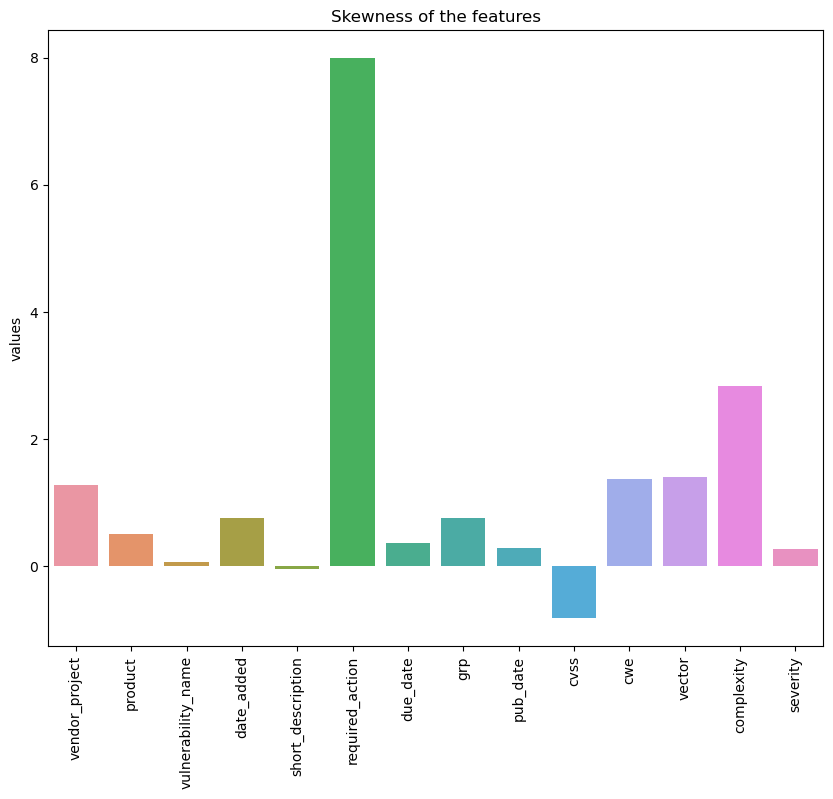

In [340]:
skew_1=pd.DataFrame(updated_df.skew())
skew_1.rename(columns={0:'values'},inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=skew_1.index,y=skew_1['values'],data=skew_1)
plt.xticks(rotation=90)
plt.title('Skewness of the features')
plt.show()

In [341]:
corr=updated_df.corr()
corr

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity
vendor_project,1.000000,0.508105,0.377888,0.185152,0.313892,-0.039553,0.201161,0.185152,0.411224,0.129916,0.105688,-0.102031,-0.060311,-0.200471
product,0.508105,1.000000,0.705799,0.524152,0.611598,0.159441,0.573718,0.524152,0.572181,0.144152,0.066422,-0.160085,-0.007321,-0.160888
vulnerability_name,0.377888,0.705799,1.000000,0.834563,0.877603,0.174919,0.858303,0.834563,0.689019,0.007236,0.203860,-0.058779,0.062201,-0.016690
date_added,0.185152,0.524152,0.834563,1.000000,0.887478,0.208502,0.983331,1.000000,0.644226,-0.062301,0.175431,0.023676,0.061462,0.071737
short_description,0.313892,0.611598,0.877603,0.887478,1.000000,0.187191,0.907876,0.887478,0.713374,-0.035212,0.188935,0.023427,0.056609,0.028381
required_action,-0.039553,0.159441,0.174919,0.208502,0.187191,1.000000,0.199404,0.208502,0.182532,0.147662,0.040167,-0.101467,-0.056051,-0.140392
due_date,0.201161,0.573718,0.858303,0.983331,0.907876,0.199404,1.000000,0.983331,0.678667,-0.050999,0.173553,0.022119,0.071682,0.054029
grp,0.185152,0.524152,0.834563,1.000000,0.887478,0.208502,0.983331,1.000000,0.644226,-0.062301,0.175431,0.023676,0.061462,0.071737
pub_date,0.411224,0.572181,0.689019,0.644226,0.713374,0.182532,0.678667,0.644226,1.000000,0.115378,0.210013,-0.046457,-0.023095,-0.110037
cvss,0.129916,0.144152,0.007236,-0.062301,-0.035212,0.147662,-0.050999,-0.062301,0.115378,1.000000,-0.052108,-0.370633,-0.278580,-0.925451


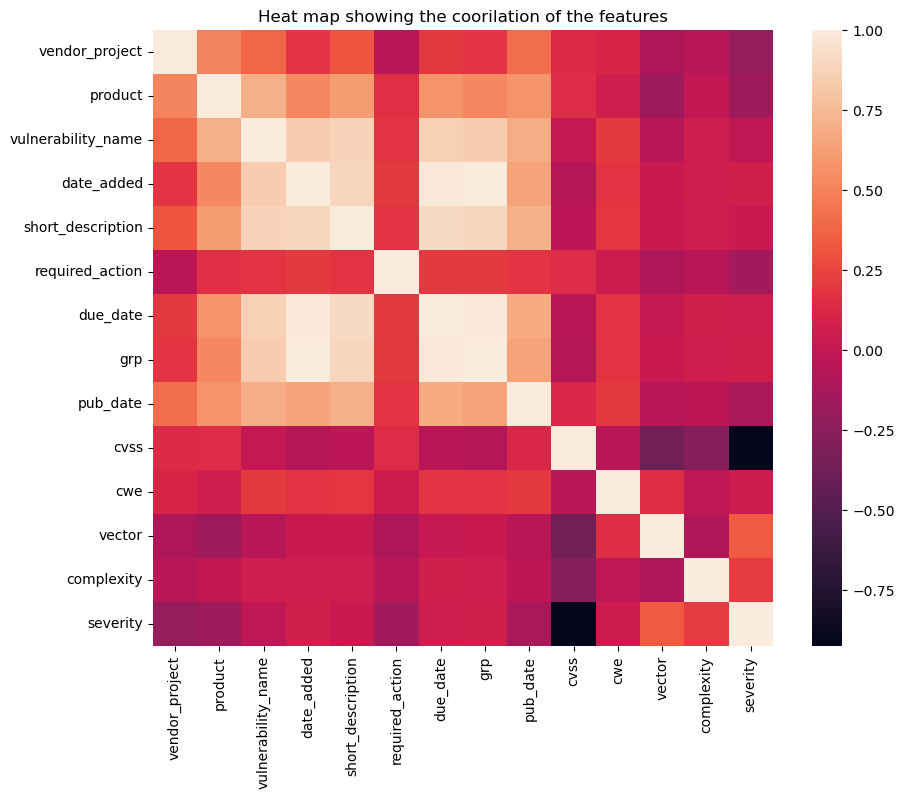

In [342]:
plt.figure(figsize=(10,8))
sns.heatmap(data=corr)
plt.title('Heat map showing the coorilation of the features')
plt.show()

# Sampling Method

In [343]:
from sklearn.cluster import KMeans

In [344]:
kmeans=KMeans(n_clusters=3, random_state=101)

In [345]:
kmeans.fit(updated_df)

KMeans(n_clusters=3, random_state=101)

In [346]:
df['cluster']=kmeans.labels_

In [347]:
df

,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,grp,pub_date,cvss,cwe,vector,complexity,severity,cluster
0,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL,2
1,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH,2
2,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL,2
3,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL,2
4,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,netgear,Multiple Devices,NETGEAR Multiple Devices Buffer Overflow Vulne...,2022-06-08,Multiple NETGEAR devices contain a buffer over...,Apply updates per vendor instructions.,2022-06-22,37,2017-05-26,9.8,CWE-119,NETWORK,LOW,CRITICAL,0
750,google,Chromium V8 Engine,Google Chromium V8 Type Confusion Vulnerability,2022-06-08,Google Chromium V8 Engine contains a type conf...,Apply updates per vendor instructions.,2022-06-22,37,2017-10-27,8.8,CWE-843,NETWORK,LOW,HIGH,1
751,google,Chromium V8 Engine,Google Chromium V8 Memory Corruption Vulnerabi...,2022-06-08,Google Chromium V8 Engine contains a memory co...,Apply updates per vendor instructions.,2022-06-22,37,2017-04-24,8.8,CWE-125,NETWORK,LOW,HIGH,1
752,google,Chromium V8 Engine,Google Chromium V8 Out-of-Bounds Memory Vulner...,2022-06-08,Google Chromium V8 Engine contains an out-of-b...,Apply updates per vendor instructions.,2022-06-22,37,2017-01-19,8.8,"CWE-125,CWE-787",NETWORK,LOW,HIGH,1


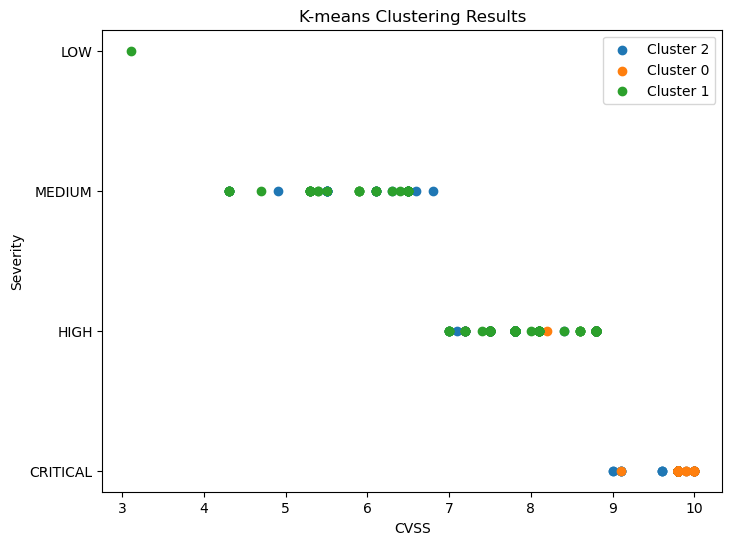

In [348]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in df['cluster'].unique():
    plt.scatter(df[df['cluster'] == cluster]['cvss'], df[df['cluster'] == cluster]['severity'], label=f'Cluster {cluster}')
plt.xlabel('CVSS')
plt.ylabel('Severity')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()
